In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

tar: \DriverData: Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


In [2]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\demo_data\7.xor.csv",header=None)

In [4]:
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [5]:
df.shape

(500, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


<AxesSubplot:xlabel='0', ylabel='1'>

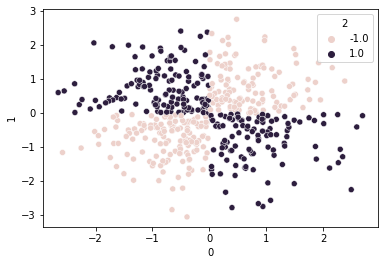

In [7]:
sns.scatterplot(x=0,y=1,hue=2,data=df)

## split into train and test

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [5]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

## build the neural networks

In [6]:
model = Sequential()
model.add(Dense(15,activation='relu',input_dim=2))

model.add(Dense(7,activation='relu'))

model.add(Dense(3,activation='sigmoid'))

model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                45        
                                                                 
 dense_1 (Dense)             (None, 7)                 112       
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [8]:
# complie model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.2)

Epoch 1/100


C:\Users\palla\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


36/36 [==============================] - 1s 9ms/step - loss: 0.4879 - accuracy: 0.0000e+00 - val_loss: 0.4573 - val_accuracy: 0.0000e+00
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4256 - accuracy: 0.0000e+00 - val_loss: 0.3952 - val_accuracy: 0.0000e+00
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3678 - accuracy: 0.0000e+00 - val_loss: 0.3366 - val_accuracy: 0.0000e+00
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.0000e+00 - val_loss: 0.2837 - val_accuracy: 0.0000e+00
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.0000e+00 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.2067 - accuracy: 0.0000e+00 - val_loss: 0.1829 - val_accuracy: 0.0000e+00
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1605 - accuracy: 0.0000e+00 - val_loss: 0.1

Epoch 57/100
36/36 [==============================] - 0s 3ms/step - loss: -2.0631 - accuracy: 0.3972 - val_loss: -2.0947 - val_accuracy: 0.4111
Epoch 58/100
36/36 [==============================] - 0s 3ms/step - loss: -2.0997 - accuracy: 0.4000 - val_loss: -2.1310 - val_accuracy: 0.4111
Epoch 59/100
36/36 [==============================] - 0s 3ms/step - loss: -2.1393 - accuracy: 0.4083 - val_loss: -2.1701 - val_accuracy: 0.4111
Epoch 60/100
36/36 [==============================] - 0s 3ms/step - loss: -2.1785 - accuracy: 0.4111 - val_loss: -2.2085 - val_accuracy: 0.4111
Epoch 61/100
36/36 [==============================] - 0s 3ms/step - loss: -2.2169 - accuracy: 0.4028 - val_loss: -2.2451 - val_accuracy: 0.4111
Epoch 62/100
36/36 [==============================] - 0s 3ms/step - loss: -2.2569 - accuracy: 0.4167 - val_loss: -2.2909 - val_accuracy: 0.4111
Epoch 63/100
36/36 [==============================] - 0s 3ms/step - loss: -2.2958 - accuracy: 0.4028 - val_loss: -2.3319 - val_accuracy:

In [10]:
y_cap= model.predict(X_test_trans)

2/2 [==============================] - 0s 0s/step


In [11]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

0.48

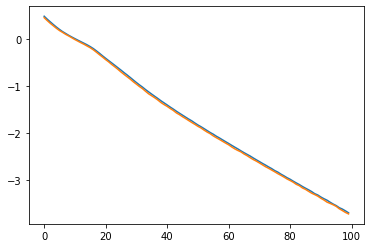

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [27]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 7s 2ms/step


<AxesSubplot:>

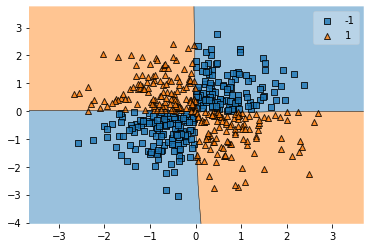

In [89]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 5s 1ms/step


<AxesSubplot:>

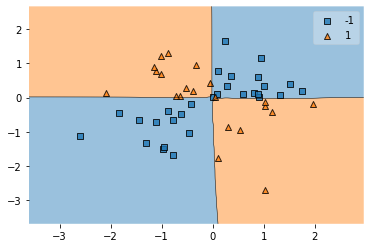

In [90]:
plot_decision_regions(X_test_trans,y_test.values.astype(int),clf=model)